In [101]:
#pip install mca

In [340]:
import mca
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, ShuffleSplit, KFold, cross_val_score, GridSearchCV, StratifiedKFold

In [492]:
rer = pd.read_csv("./Stations/MP.csv", low_memory=False)

# Cleaning again

In [494]:
rer['scheduled_arrival'] = pd.to_datetime(rer['scheduled_arrival'], format='%Y-%m-%d %H:%M:%S')

rer = rer.sort_values(by='destination_name', ascending=False)
rer['destination_name'] = pd.factorize(rer["destination_name"])[0]

rer = rer.sort_values(by='nearest_datetime', ascending=True)

rer["departure_status"] = rer["departure_status"].astype("string")
rer["is_day"] = rer["is_day"].astype(int)

In [496]:
rer['pourc_validations'] = rer['pourc_validations'].fillna(0)

In [498]:
rer.loc[rer['scheduled_arrival'].dt.month == 12, 'E10'] = 1.76
rer.loc[rer['scheduled_arrival'].dt.month == 12, '95'] = 1.79
rer.loc[rer['scheduled_arrival'].dt.month == 12, '98'] = 1.87
rer.loc[rer['scheduled_arrival'].dt.month == 12, 'gazole'] = 1.7

rer.loc[rer['scheduled_arrival'].dt.month == 1, 'E10'] = 1.76
rer.loc[rer['scheduled_arrival'].dt.month == 1, '95'] = 1.79
rer.loc[rer['scheduled_arrival'].dt.month == 1, '98'] = 1.87
rer.loc[rer['scheduled_arrival'].dt.month == 1, 'gazole'] = 1.7

rer['scheduled_arrival'] = rer['scheduled_arrival'].fillna(rer['scheduled_departure'])

In [500]:
rer = rer.drop(['stop_name', "timestamp", "real_departure", "nearest_datetime", "scheduled_departure", "Période", "real_arrival", "arrival_difference", "departure_difference", "ArRTown", "Date", "day_type", "is_bank_holiday", "is_weekend"], axis=1)

In [502]:
rer_learn = rer
rer_test = rer

start_date = pd.to_datetime('2024-11-02 00:00:00')
end_date = pd.to_datetime('2025-01-12 23:59:59')

start_date2 = pd.to_datetime('2025-01-13 00:00:00')
end_date2 = pd.to_datetime('2025-01-19 23:59:59')

rer_learn = rer_learn[(rer_learn['scheduled_arrival'] >= start_date) & (rer_learn['scheduled_arrival'] <= end_date)]
rer_test = rer_test[(rer_test['scheduled_arrival'] >= start_date2) & (rer_test['scheduled_arrival'] <= end_date2)]


# PCA

In [505]:
# Select numerical variables
numerical_vars = metro_learn.select_dtypes(include=['float64'])

# Standardize the numerical variables
scaler = StandardScaler()
numerical_vars_scaled = scaler.fit_transform(numerical_vars)

# Perform PCA
pca = PCA()
pca_results = pca.fit_transform(numerical_vars_scaled)

NameError: name 'metro_learn' is not defined

In [429]:
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(
    pca_results,
    columns=[f'PC{i+1}' for i in range(pca_results.shape[1])]
)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Output the PCA results and explained variance
print("Explained Variance Ratio:", explained_variance)
print("PCA DataFrame Head:\n", pca_df.head())

Explained Variance Ratio: [0.21958838 0.20190111 0.13329036 0.10182305 0.09368244 0.07615144
 0.0590339  0.04749799 0.03954581 0.01990071 0.00362252 0.0027514
 0.0012109 ]
PCA DataFrame Head:
         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.136439  1.031619  1.179635 -0.779641  0.962838 -0.103913  5.262836   
1  3.128144  1.040497  1.165919 -0.799500  0.988114  0.115399  5.272590   
2  3.136439  1.031619  1.179635 -0.779641  0.962838 -0.103913  5.262836   
3  3.128144  1.040497  1.165919 -0.799500  0.988114  0.115399  5.272590   
4  3.136439  1.031619  1.179635 -0.779641  0.962838 -0.103913  5.262836   

        PC8       PC9      PC10      PC11      PC12      PC13  
0  0.306390  0.099832  0.318333 -0.102640  0.021590  0.002409  
1  0.287887  0.100366  0.312983 -0.101592  0.022258  0.003825  
2  0.306390  0.099832  0.318333 -0.102640  0.021590  0.002409  
3  0.287887  0.100366  0.312983 -0.101592  0.022258  0.003825  
4  0.306390  0.099832  0.318333 -0.1

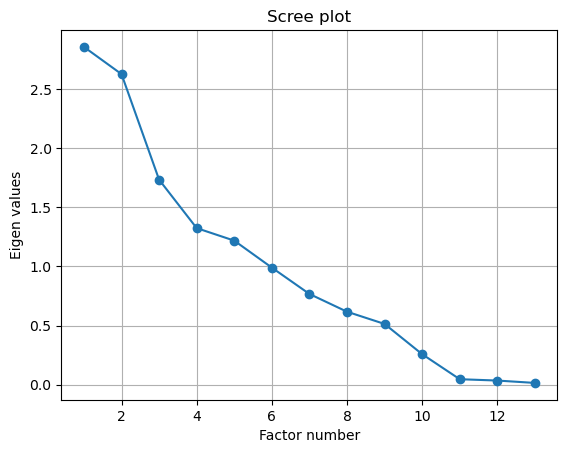

In [433]:
# -or
# Assuming you already have your dataset loaded into 'APK' DataFrame and it's preprocessed

# Select numerical columns
numerical_vars = metro_learn.select_dtypes(include=['float64'])

# Standardize the data
scaler = StandardScaler()
numerical_vars_scaled = scaler.fit_transform(numerical_vars)

# Perform PCA
pca = PCA()
pca.fit(numerical_vars_scaled)

# Eigenvalues (explained variance for each principal component)
eigval = pca.explained_variance_

# Number of components (k)
k = len(eigval)

# Scree plot
plt.plot(np.arange(1, k + 1), eigval, marker='o')
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.grid(True)
plt.savefig('Screeplot.png', bbox_inches='tight', dpi=300)
plt.show()


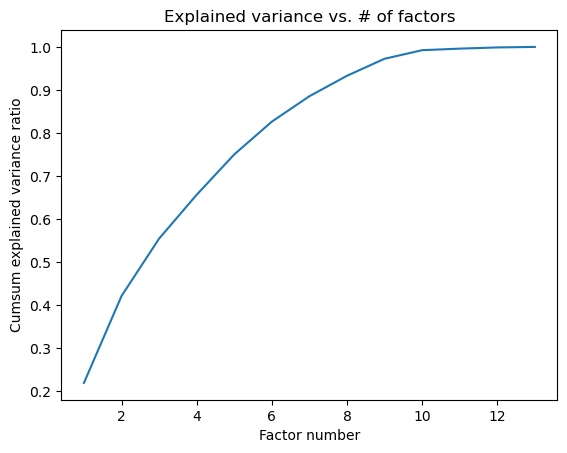

In [435]:
plt.plot(np.arange(1,k+1),np.cumsum(pca.explained_variance_ratio_)) 
plt.title("Explained variance vs. # of factors") 
plt.ylabel("Cumsum explained variance ratio") 
plt.xlabel("Factor number") 
plt.savefig('CumSumPlot.png', bbox_inches='tight', dpi=300)
plt.show()

In [255]:
## 5 factors picked for expainability

In [258]:
eigval

array([2.62727289, 1.95070558, 1.20435089, 1.00108053, 0.61416811,
       0.53790141, 0.05368962, 0.01188291])

In [202]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.32883105 0.56766075 0.72139829 0.84537821 0.92350753 0.99134853
 0.99803734 1.        ]


# MCA - to do

In [153]:
# Assuming APK_learn is your DataFrame, and categorical columns are encoded as integers
# Select columns that are of integer type (numerical encoded categorical columns)
categorical_columns = APK_learn.select_dtypes(include=['int64']).columns

# Run MCA using the mca library, specifying n_components for multiple components
mca_model = mca.MCA(APK_learn[categorical_columns], ncols=7)  # Request 7 components

# Access the MCA results (coordinates of the data points in the reduced space)
mca_results = mca_model.fs_r()  # Call the function to get the result

# Create a DataFrame with the MCA results
mca_df = pd.DataFrame(mca_results, columns=[f'MCA{i+1}' for i in range(mca_results.shape[1])])

# Display the first few rows of the MCA results
print(mca_df.head())


       MCA1
0  0.090216
1  0.158122
2  0.119318
3  0.158122
4  0.090216


In [ ]:
# Optionally, you can plot the first two components (MCA1 vs MCA2)
plt.figure(figsize=(10, 6))
plt.scatter(mca_df['MCA1'], mca_df['MCA2'], alpha=0.5)
plt.title('MCA: First Two Components')
plt.xlabel('MCA1')
plt.ylabel('MCA2')
plt.grid(True)
plt.show()

# Random Forest

In [507]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)  #% of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  #create result table
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

print(missing_values_table(rer_learn)) 

There are 4 columns that have missing values.
        Missing Values  % of Total Values
95                   2                0.0
98                   2                0.0
E10                  2                0.0
gazole               2                0.0


### include standardised float cols - unfinished

# prediction

In [402]:
#APK_learn = APK_learn.drop(["scheduled_arrival"], axis=1)
#APK_learn["scheduled_arrival"] = APK_learn["scheduled_arrival"].astype(object)
# Convert datetime to numeric timestamp
#APK_learn['scheduled_arrival_numeric'] = APK_learn['scheduled_arrival'].apply(lambda x: x.timestamp())

In [511]:
rer_learn = rer_learn.copy()
rer_learn.loc[:, 'scheduled_arrival' + '_year'] = rer_learn['scheduled_arrival'].dt.year
rer_learn.loc[:, 'scheduled_arrival' + '_month'] = rer_learn['scheduled_arrival'].dt.month
rer_learn.loc[:, 'scheduled_arrival' + '_day'] = rer_learn['scheduled_arrival'].dt.day
rer_learn.loc[:, 'scheduled_arrival' + '_hour'] = rer_learn['scheduled_arrival'].dt.hour
rer_learn.loc[:, 'scheduled_arrival' + '_minute'] = rer_learn['scheduled_arrival'].dt.minute
rer_learn.loc[:, 'scheduled_arrival' + '_second'] = rer_learn['scheduled_arrival'].dt.second

rer_test = rer_test.copy()
rer_test.loc[:, 'scheduled_arrival' + '_year'] = rer_test['scheduled_arrival'].dt.year
rer_test.loc[:, 'scheduled_arrival' + '_month'] = rer_test['scheduled_arrival'].dt.month
rer_test.loc[:, 'scheduled_arrival' + '_day'] = rer_test['scheduled_arrival'].dt.day
rer_test.loc[:, 'scheduled_arrival' + '_hour'] = rer_test['scheduled_arrival'].dt.hour
rer_test.loc[:, 'scheduled_arrival' + '_minute'] = rer_test['scheduled_arrival'].dt.minute
rer_test.loc[:, 'scheduled_arrival' + '_second'] = rer_test['scheduled_arrival'].dt.second

In [512]:
rer_learn.drop(['scheduled_arrival'], axis=1, inplace=True)  # Drop the original datetime column if not needed
rer_test.drop(['scheduled_arrival'], axis=1, inplace=True)  # Drop the original datetime column if not needed

In [515]:
#APK_learn = APK_learn[['scheduled_arrival_numeric'] + [col for col in APK_learn.columns if col != 'scheduled_arrival_numeric']]

In [517]:
# Assuming APK_learn is your DataFrame
# Extract the explanatory variables and the target variable
rer_learn_X = rer_learn.drop('departure_status', axis=1)  # Features (exclude target)
rer_learn_Y = rer_learn['departure_status']  # Target variable

# Train-test split (80-20 split)
X_train, X_test, Y_train, Y_test = train_test_split(rer_learn_X, 
                                                    rer_learn_Y, 
                                                    test_size=0.2, 
                                                    random_state=2,
                                                    stratify=rer_learn_Y)


In [519]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
rf_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [521]:
# Perform GridSearchCV with StratifiedKFold cross-validation
cv_folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
rf_cv = GridSearchCV(rf, rf_grid, cv=cv_folds, n_jobs=-1, scoring='accuracy')

In [523]:
rf_cv.fit(X_train, Y_train)
best_model = rf_cv.best_estimator_

# Output the best hyperparameters found by GridSearchCV
print(f"Best hyperparameters: {rf_cv.best_params_}")

Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [524]:
rer_test_X = rer_test.drop('departure_status', axis=1)  # Features (exclude target)
rer_test_Y = rer_test['departure_status']  # Target variable


In [525]:
# Evaluate the model on the test set
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(rer_test_X)

# Print the accuracy on training and test sets
print(f"Training Accuracy: {accuracy_score(Y_train, y_pred_train):.4f}")
print(f"Test Accuracy: {accuracy_score(rer_test_Y, y_pred_test):.4f}")

# Create DataFrames for plotting prediction vs true values
train_pred_vs_true = pd.DataFrame({'True': Y_train, 
                                   'Predicted': y_pred_train})

test_pred_vs_true = pd.DataFrame({'True': rer_test_Y, 
                                  'Predicted': y_pred_test})

Training Accuracy: 0.8948
Test Accuracy: 0.8856


In [526]:
# Assuming 'PRIMARY_KEY' is a column in your test set
# Create a DataFrame with PRIMARY_KEY and predicted target values
predictions_df = pd.DataFrame({
    'datetime': rer_test_X[['scheduled_arrival_year', 'scheduled_arrival_month', 'scheduled_arrival_day', 
                           'scheduled_arrival_hour', 'scheduled_arrival_minute', 'scheduled_arrival_second']].apply(
                            lambda row: '-'.join(row.astype(str)), axis=1),  # Combine as a single key
    'target': y_pred_test
})


# Save the predictions to a CSV file
#predictions_df.to_csv('APK_prediction.csv', index=False, sep=',', float_format='%.6f')  # Save with US decimal notation


In [527]:
#rer_pred = pd.read_csv("APK_prediction.csv")

In [528]:
# Generate confusion matrix
conf_matrix = confusion_matrix(rer_test_Y, y_pred_test)
print(conf_matrix)


[[  0  82]
 [  0 635]]


In [529]:
rer['departure_status'].value_counts()

departure_status
onTime     6397
delayed    1041
Name: count, dtype: Int64